In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../Data/HospitalityEmployees.csv')

In [3]:
df.columns = ['ds','y']

In [4]:
df['ds'] = pd.to_datetime(df['ds'])

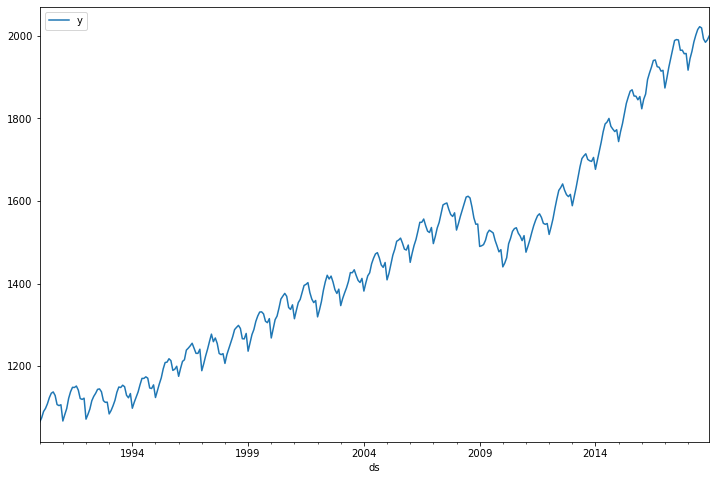

In [6]:
df.plot(x='ds',y='y',figsize=(12,8))

In [7]:
m = Prophet()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [8]:
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1107.222654,1048.293106,1071.464723,1107.222654,1107.222654,-47.615384,-47.615384,-47.615384,-47.615384,-47.615384,-47.615384,0.0,0.0,0.0,1059.607270
1,1990-02-01,1107.739953,1062.396831,1087.756248,1107.739953,1107.739953,-33.159370,-33.159370,-33.159370,-33.159370,-33.159370,-33.159370,0.0,0.0,0.0,1074.580583
2,1990-03-01,1108.207192,1077.673748,1101.691857,1108.207192,1108.207192,-18.675629,-18.675629,-18.675629,-18.675629,-18.675629,-18.675629,0.0,0.0,0.0,1089.531563
3,1990-04-01,1108.724491,1093.853474,1117.432341,1108.724491,1108.724491,-3.017789,-3.017789,-3.017789,-3.017789,-3.017789,-3.017789,0.0,0.0,0.0,1105.706702
4,1990-05-01,1109.225104,1110.242589,1135.982139,1109.225104,1109.225104,13.305066,13.305066,13.305066,13.305066,13.305066,13.305066,0.0,0.0,0.0,1122.530169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2019-08-01,2085.143659,2098.683163,2127.945648,2081.253677,2089.525971,28.058594,28.058594,28.058594,28.058594,28.058594,28.058594,0.0,0.0,0.0,2113.202253
356,2019-09-01,2090.655305,2089.518098,2118.882640,2085.474771,2096.357343,12.463772,12.463772,12.463772,12.463772,12.463772,12.463772,0.0,0.0,0.0,2103.119077
357,2019-10-01,2095.989156,2074.539777,2105.970763,2089.157398,2103.068439,-6.036430,-6.036430,-6.036430,-6.036430,-6.036430,-6.036430,0.0,0.0,0.0,2089.952726
358,2019-11-01,2101.500802,2071.880677,2104.781809,2093.194520,2110.119823,-13.230209,-13.230209,-13.230209,-13.230209,-13.230209,-13.230209,0.0,0.0,0.0,2088.270592


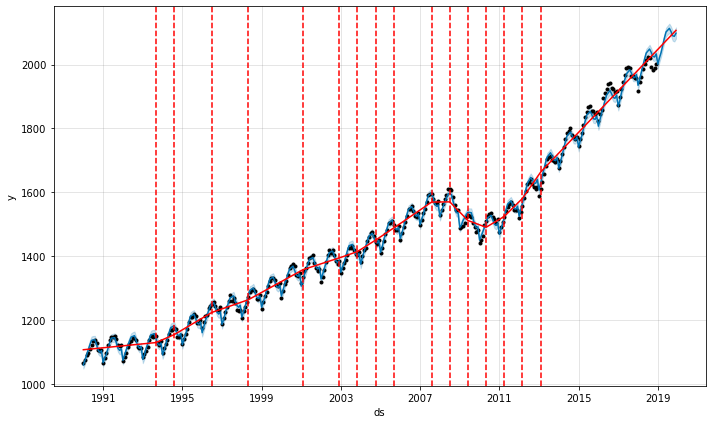

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

# Seasonality

In [13]:
df1 = pd.read_csv('../Data/airline_passengers.csv')

In [22]:
df1.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [23]:
df1.columns = ['ds','y']

In [24]:
df1['ds'] = pd.to_datetime(df1['ds'])

In [25]:
m = Prophet()

In [26]:
m.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


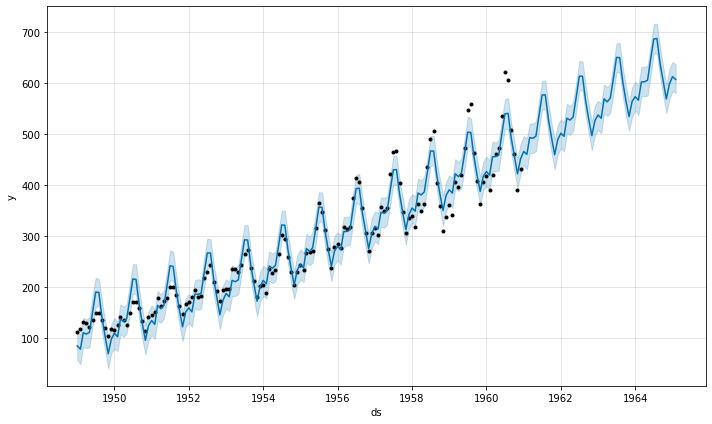

In [27]:
future = m.make_future_dataframe(periods=50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

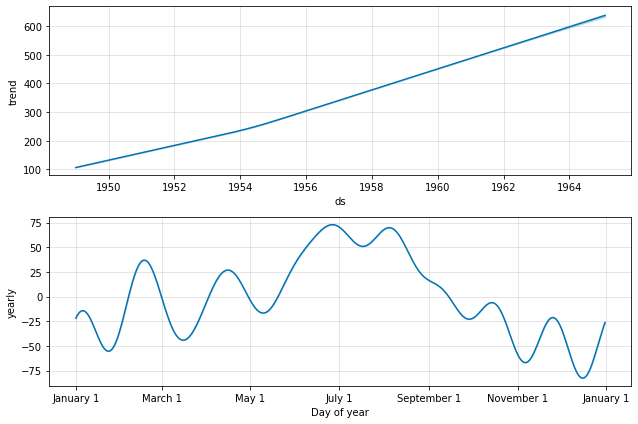

In [28]:
fig = m.plot_components(forecast);

In [29]:
 from fbprophet.plot import add_changepoints_to_plot

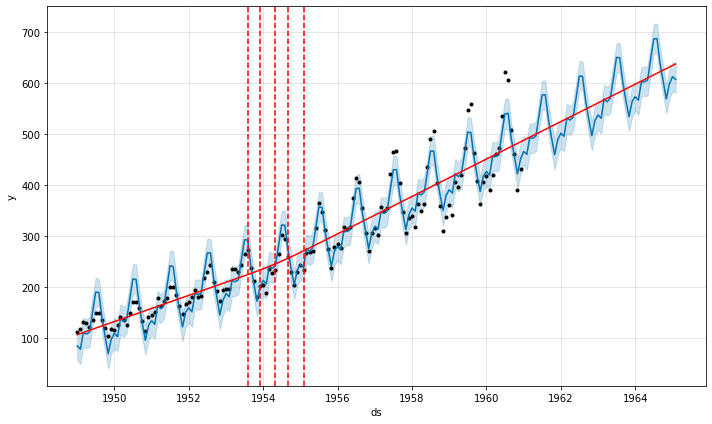

In [31]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast) #gca -- get current axis

#Changing our seasonality mode to multiplicative mode

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


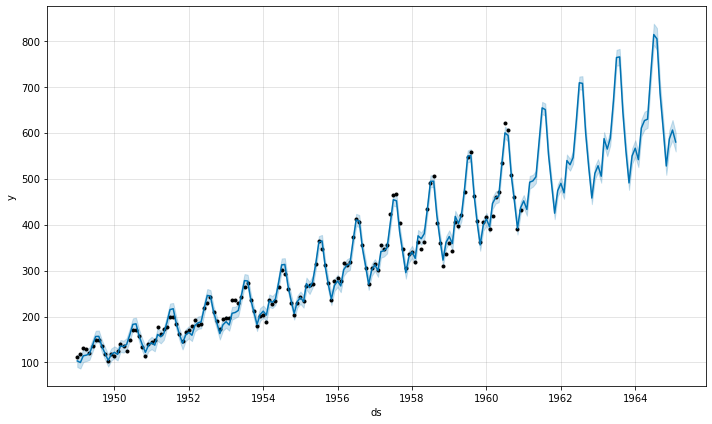

In [34]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df1)
future = m.make_future_dataframe(periods=50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

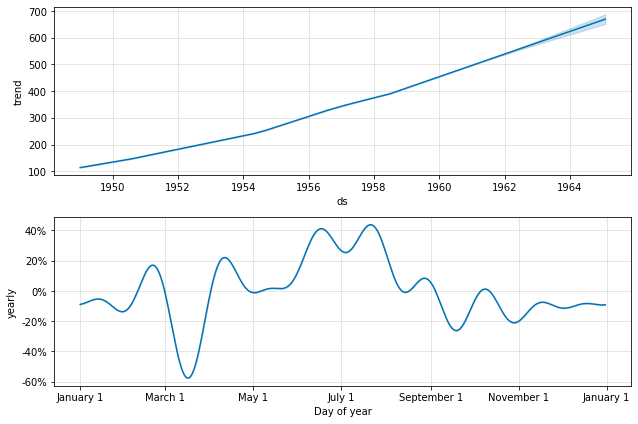

In [35]:
fig = m.plot_components(forecast);